In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\Sebastian\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [3]:

#Initializing starting values 
visible_size = 2

n_hid_start = 0
n_hid = n_hid_start
hid_inc = 1
total_hid = 4

seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)



energy_4_list = []
energy_8_list = []


time_list =[]
n_hid_list =[]



In [4]:
energy_list=[]
true_energy_list=[]

for v in [2,4,6]:
    
            
    np.random.seed(seed)

    gamma = gamma = utils.random_gamma(v)
    ih = IsingHamiltonian(gamma=gamma)
    ihr = IsingHamiltonianReduced(gamma=gamma)
    
    eig,_ = np.linalg.eigh(ih)
    E_truth = np.min(eig)
    true_energy_list.append(E_truth)

    
    energies=[]
    
    for i in range(1,4): 
        visible_size = v
        hidden_size = 4*i
        
        np.random.seed(seed)

        rbm = RBM(visible_size=visible_size, hidden_size=n_hid, hamiltonian=ihr, walker_steps=1000)
        
        energies.append(rbm.train(iterations=500, lr=0.01, print_energy=False))
        time_list.append(rbm.train.run_time)
        
    
        # Print loop    
    
    
    energy_list.append(energies)



func:train args:[(<src.nqs.RBM object at 0x000002B256276160>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 124.86055278778076 sec
func:train args:[(<src.nqs.RBM object at 0x000002B253ED03D0>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 136.20428252220154 sec
func:train args:[(<src.nqs.RBM object at 0x000002B253ECAC70>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 150.8312840461731 sec
func:train args:[(<src.nqs.RBM object at 0x000002B253A55280>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 144.56173992156982 sec
func:train args:[(<src.nqs.RBM object at 0x000002B253E5D040>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 162.19744992256165 sec
func:train args:[(<src.nqs.RBM object at 0x000002B256276D60>,), {'iterations': 500, 'lr': 0.01, 'print_energy': False}] took: 135.02564525604248 sec
func:train args:[(<src.nqs.RBM object at 0x000002B253E5D040>,), {'iterations': 500, 'lr': 0.01, 'print_ener

<IPython.core.display.Javascript object>


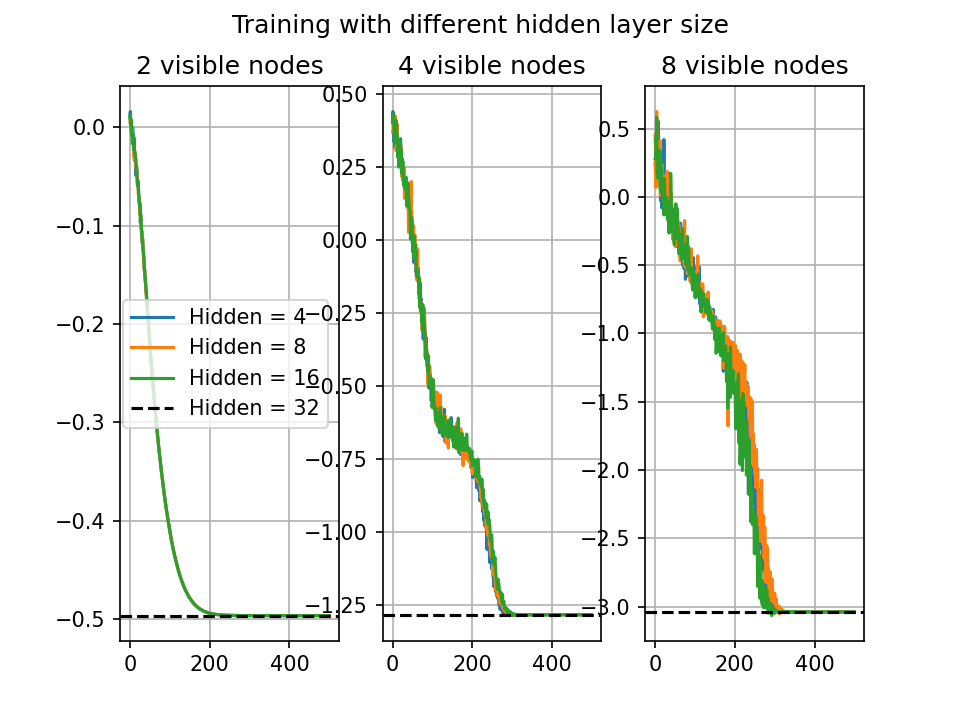

In [5]:
labels = [f"Hidden = {2**(i+1)}" for i in range(1,5)]
labels.append("True energy")

n_hid_list = np.asarray([i*4 for i in range(1,5)])
#plt.figure(1)
# plt.ioff() # uncomment to stop plotting in notebook
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Training with different hidden layer size')

ax1.set_title("2 visible nodes")
ax2.set_title("4 visible nodes")
ax3.set_title("8 visible nodes")

for energy in energy_list[0]:
    ax1.plot(energy)
    
    
ax1.axhline(y=true_energy_list[0], color='k', linestyle='--')
ax1.legend(labels)

for energy in energy_list[1]:
    ax2.plot(energy)

ax2.axhline(y=true_energy_list[1], color='k', linestyle='--')
#ax2.legend(labels)
    
for energy in energy_list[2]:
    ax3.plot(energy)

ax3.axhline(y=true_energy_list[2], color='k', linestyle='--')


ax1.grid()
ax2.grid()
ax3.grid()
#ax3.legend(labels)








In [71]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-Hidden layer size"
os.makedirs(path)
plt.savefig(f"{path}/{visible_size}hidden_size.pdf")